# Grupos Kleinianos
## Tarea 1
### García Fierros Nicky
----------------

## Ejercicio 1
Mejora el algoritmo que determina si un número entero es primo (visto en clase), donde no se tomen como presuntos divisores los múltiplos de 2 mayores que 2, e impleméntalo.

In [2]:
function esPrimo(z)
    divis = 2
    es_primo = true
    while divis^2 <= z
        if z % divis == 0 
            es_primo = false
            break
        end
        
        #println(divis)
        divis += (divis + 1) % 2 == 0 ? 2 : 1
        #divis += 1
    end

    es_primo ? println("$z es primo") : println("$z no es primo")
end

esPrimo(103232430071)

103232430071 es primo


## Ejercicio 2

Programa una function que implemente el método de Newton-Raphson (visto en clase) para encontrar una raíz de funciones $f : \mathbb{R} → \mathbb{R}$.

In [3]:
function newtonRhapson(f, Df, x₀ :: Real, δ = 1e-6, max_iter = 100)
    # cuerpo de la function
    xₙ = x₀
    it = 0
    while abs(f(xₙ)) > δ
        ratio = (f(xₙ) / Df(xₙ))
        
        if (it > max_iter) || (abs(Df(xₙ)) < δ) 
            println("Se excedió el número de iteraciones especificadas antes de que el método converja.")
            println("Una raíz aproximada de f es $xₙ")
            println("La razón entre f y su derivada en la raíz aproximada es $ratio")
            break
        end
        
        xₙ = xₙ - (f(xₙ) / Df(xₙ))
        
        it += 1
    end
    
    println("Una raíz aproximada de f es $xₙ")
    println("f($xₙ) = $(f(xₙ))")
end

newtonRhapson(x -> x^3 - 2x, x -> 3x^2 - 2, 5)


Una raíz aproximada de f es 1.4142135739869761
f(1.4142135739869761) = 4.645552476034709e-8


## Ejercicio 3

Programa una function que, a partir de una lista de puntos, dibuje el siguiente pez:
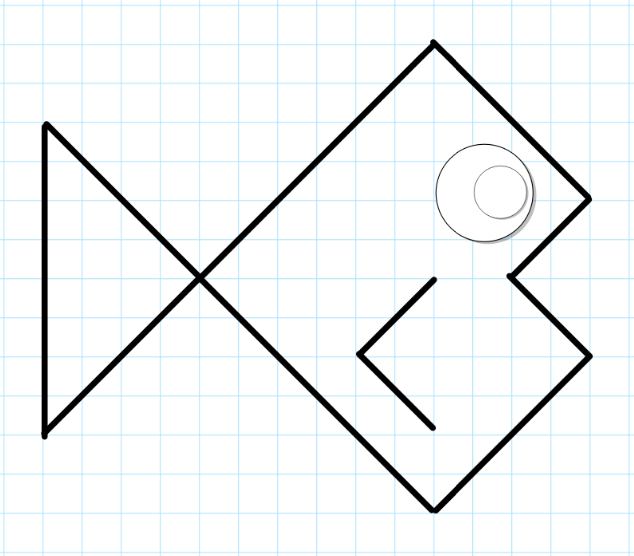

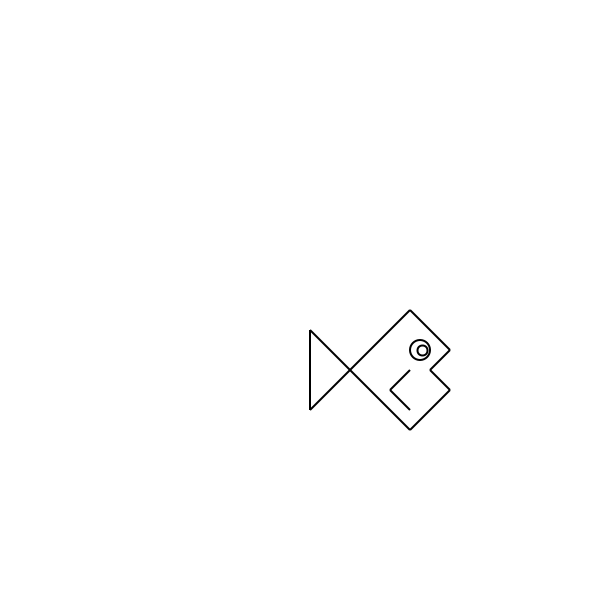

In [4]:
using Luxor

vertices_cuerpo = [
    complex(10,  30), #cola sup
    complex(110, 130), #dorso inf
    complex(150, 90), #boca inf
    complex(130, 70), #boca mid
    complex(150, 50), #boca sup
    complex(110, 10), #dorso sup
    complex(10, 110), #cola intersec
    complex(10, 30), #cola inf
]

vertices_aleta = [
    complex(110, 70),
    complex(90, 90),
    complex(110, 110)
]

function drawlineseg(z1, z2)
    line(
        Point(real(z1), imag(z1)), 
        Point(real(z2), imag(z2)), 
        :stroke
    )
end

function drawPez(cords_cuerpo::Vector, cords_aleta::Vector)
    i = 1
    while i < length(cords_cuerpo)
        drawlineseg(cords_cuerpo[i], cords_cuerpo[i+1])
        i+= 1
    end

    i = 1
    while i < length(cords_aleta)
        drawlineseg(vertices_aleta[i], vertices_aleta[i+1])
        i += 1
    end

    #ojo exterior
    circle(
        real(cords_cuerpo[5])-30, 
        imag(cords_cuerpo[5]), 
        10,
        :stroke
    )

    #ojo interior
    circle(
        real(cords_cuerpo[5])-27.5, 
        imag(cords_cuerpo[5])+0.5, 
        5,
        :stroke
    )
end

@draw drawPez(vertices_cuerpo, vertices_aleta)

## Ejercicio 4

Programa una function para dibujar la gráfica de cualquier función $f : \mathbb{R} \to \mathbb{R}$. Uno de los argumentos de la function debe ser un el color para la gráfica de la función f.

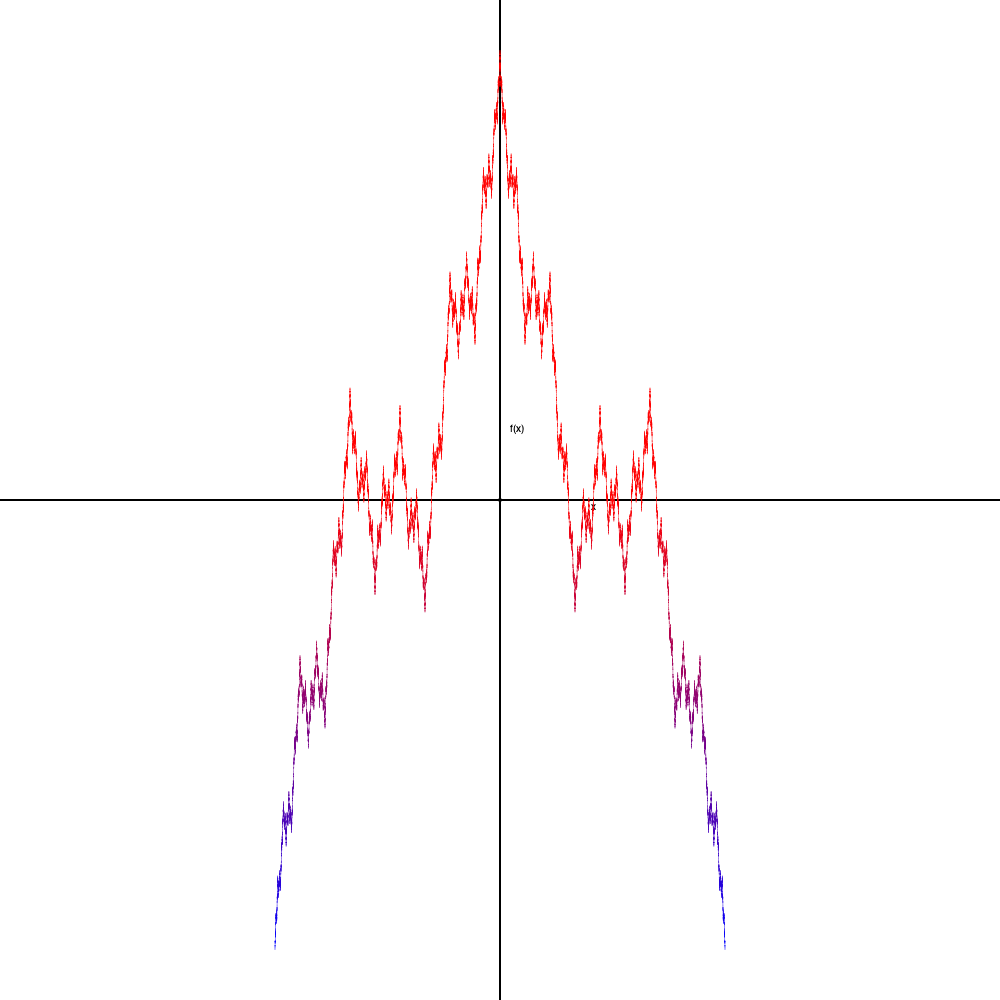

In [5]:
using Luxor, Colors

function graficarFun(fun, dom, color, scale=1, gradientcolors=false)
    circle(0, 0, 1, :stroke)
    
    # dibujando ejes cartesianos
    max_x = scale*(dom[end] + 50)
    max_y = scale*(fun(dom[end]) + 50)
    line(Point(-max_x, 0), Point(max_x, 0), :stroke)
    line(
        Point(0, max_y), 
        Point(0, -max_y),
        :stroke
    )

    text("f(x)", Point(10, -max_y/scale - 20), halign=:left,  valign = :center)
    text("x", Point(max_x/scale + 40, 10), halign=:left,  valign = :center)

    # dibujando la function
    #println(imagen)
    setline(0.5)
    i = 1
    if gradientcolors == false
        imagen = scale .*[Point(x, -fun(x)) for x ∈ dom]
        setcolor(color)
        while i < length(imagen)
            line(imagen[i], imagen[i+1], :stroke)
            i += 1
        end
    else
        imagen = scale .*[-fun(x) for x ∈ dom]
        max_red = maximum(imagen)
        while i < length(imagen)
            rojo = maximum([imagen[i], imagen[i+1]])/max_red
            setcolor(RGB(1-rojo, 0, rojo))
            line(
                Point(scale*dom[i], imagen[i]), 
                Point(scale*dom[i+1], imagen[i+1]), 
                :stroke
            )

            i += 1
        end
    end
    
    
end

function weierstrass(x::Real)
    sum = 0
    
    a = 1/2#rand(0.001:0.01:0.999)
    b = 3#7

    for n ∈ 0:1000
        sum += a^n * cos(b^n * π * x)
    end

    return sum
end

@draw graficarFun(weierstrass, -1:0.00001:1, HSV(210,1,1), 225, true) 1000 1000
#@draw graficarFun(x -> x, -10:10, HSV(210,1,1), 100, true) 1000 1000


## Ejercicio 5

Tómese una ecuación diferencial del siguiente tipo:
$$ \dot{p} = f(p, t)$$

donde $p ∈ \mathbb{R}^2$ y $t ∈ \mathbb{R}$. Se puede resolver numéricamente con el método de Euler hacia adelante, que consiste en el siguiente método iterativo:

$$
\begin{align*}
p_1 &= p_0 + \delta f(p_0, 0)\\
p_2 &= p_1 + \delta f(p_1, \delta)\\
p_3 &= p_2 + \delta f(p_2, 2\delta)\\
&\vdots\\
p_{n+1} &= p_n + \delta f(p_n, n\delta)
\end{align*}
$$

donde $p_0 = (x_0,y_0)$ son las condiciones iniciales y $\delta ∈ \mathbb{R}$ es el paso de tiempo.

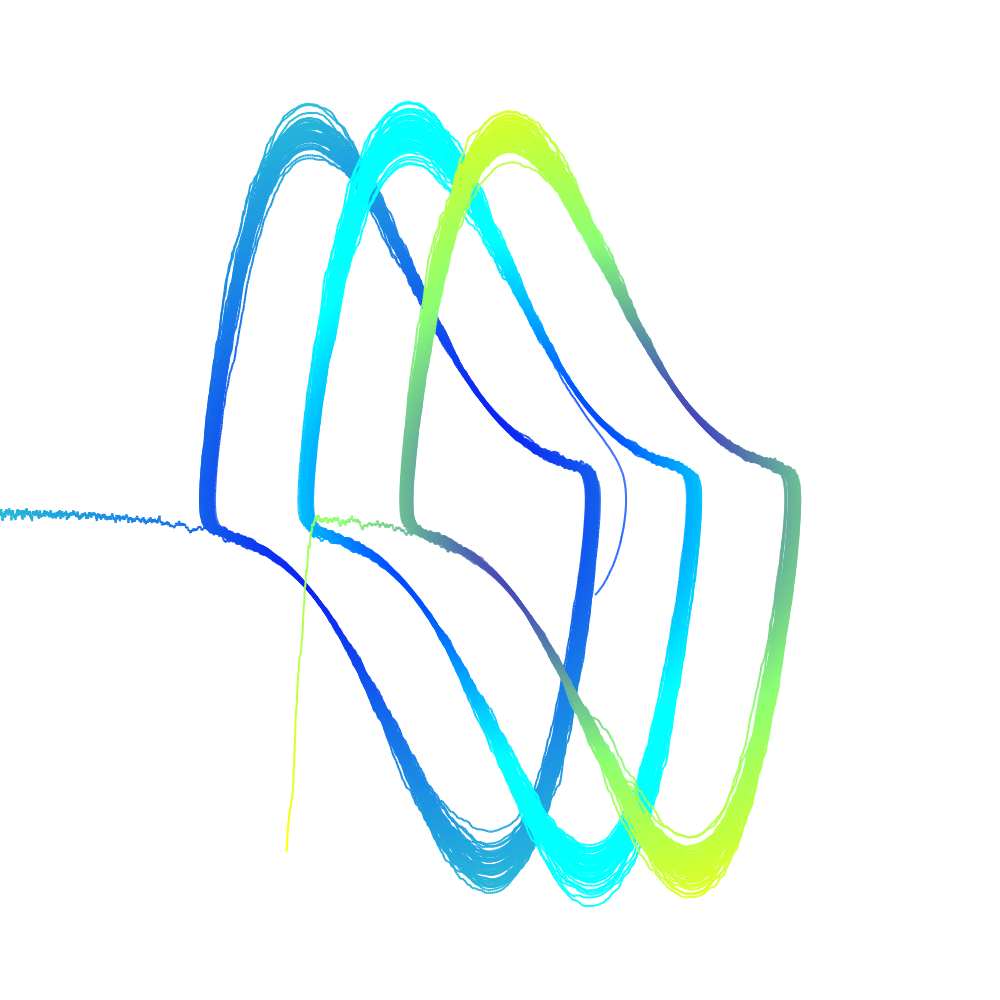

In [6]:
using Colors, Luxor

# Puntos son complex. Para poder sumar y para poder obtener la distancia (abs)

function eulerAdelante(fun, p₀::Complex, δ::Real, N=100)
    pₙ :: Vector{Complex} = [p₀]
    tₙ :: Vector{Real} = [0]

    for i ∈ 1:N
        #println("pₙ[$i] = $(pₙ[i])")
        psig = pₙ[i] + δ*fun(pₙ[i])
        #println("psig = $psig")
        push!(pₙ, psig)#, (i-1)*δ))
        push!(tₙ, i*δ)
        #pₙ = pₙ + δ*fun(pₙ, i*δ)
    end


    return (pₙ, tₙ)
end

function vanDerPool(p::Complex)
    μ = rand(0.01:0.001:3.999999)
    px = real(p)
    py = imag(p)

    return complex(py, μ * (1 - px^2) * py - px)
end

function cplexToPoint(z::Complex)
    return Point(real(z), imag(z))
end

function dibujarSol(fun, p₀::Complex, δ::Real, scale=1, N=100, param_rojo=1, param_amarillo=1, traslation=0)
    μ = rand(0.001:0.01:4)
    #println("Condición inicial : $p₀")
    pₙ, tₙ = eulerAdelante(vanDerPool, p₀, δ, N)

    #println(pₙ)

    i = 1

    absvals = abs.(pₙ)

    absmax = maximum(absvals)

    while i < length(pₙ)
        rojo = param_rojo*(abs(pₙ[i])/absmax)
        #setcolor(RGB(rojo, param_amarillo*log(absmax), 1-rojo))
        setcolor(RGB(rojo, param_amarillo*log(abs(pₙ[i])), 1-rojo))
        #setcolor(RGB(rojo, 1 - param_amarillo*exp(rojo), 1-rojo))
        line(
            cplexToPoint(traslation + scale * pₙ[i]), #?
            cplexToPoint(traslation + scale * pₙ[i+1]),
            :stroke
        )
        i += 1
    end
end 

function dibujaVarios(fun, cond_iniciales :: Vector{ComplexF64}, δ, scale=1, N=100)
    fontsize(25); label("x", :S, Point(100,0)); label("y", :SW, Point(0,-100)) # Ojo: Nombres de los ejes antes de invertir!

    #= for i ∈ 1:cuantos
        print(i)
        dibujarSol(fun, cond_iniciales[i], δ, scale, N, rand(0.7:0.001:1))
    end =#

    dibujarSol(fun, cond_iniciales[3], δ, scale, N, 0.5, 0.5, -100)
    dibujarSol(fun, cond_iniciales[1], δ, scale, N, 0, 1, 0)
    dibujarSol(fun, cond_iniciales[2], δ, scale, N, 1, 1, 100)
end


condiciones = [
    1 + 1.0im,
    -3.3 + 3.7im,
    -10 - 10.0im
]

@draw dibujaVarios(
    vanDerPool,              # fun
    condiciones,             # cond_iniciales
    0.005,                   # δ
    95,                     # scale
    100000) 1000 1000        # N
